In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import portafilio_profesional.utils.paths as path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [12]:
path.data_processed_dir()

PosixPath('/home/dracdarktime/Documents/Proyectos/platzi/crear_portafolio/portafilio_profesional/data/processed')

In [13]:
dir_catalogos = path.data_raw_dir('catalogos')
dir_atus = path.data_raw_dir('conjunto_de_datos')

In [ ]:
df_list = []  # Lista para almacenar los DataFrames

for file_index, file_name in enumerate(os.listdir(dir_atus)):
    #print(file_index)  # Mostrar el índice del archivo procesado
    file_path = dir_atus.joinpath(file_name)  # Construir la ruta completa del archivo
    df = pd.read_csv(file_path, index_col=False)  # Leer el archivo CSV
    df_list.append(df)  # Agregar el DataFrame a la lista


In [6]:
# Concatenar todos los DataFrames en uno solo
df_total = pd.concat(df_list, axis=0, ignore_index=True)

In [14]:
name_catalogos = path.data_processed_dir().joinpath("catalogos.csv")
name_atus = path.data_processed_dir().joinpath("ATUS.csv")

In [15]:
def name(x):
    name = path.data_raw_dir('catalogos').joinpath(x)
    return name

In [ ]:
df_total.drop(['ESTATUS', 'ID_MINUTO','COBERTURA'], inplace=True, axis=1)

In [11]:
df_total.to_csv('/home/dracdarktime/Documents/Proyectos/platzi/crear_portafolio/portafilio_profesional/data/processed/ATUS.csv')

In [17]:
tc_entidad = pd.read_csv(name('tc_entidad.csv'))
tc_municipio = pd.read_csv(name('tc_municipio.csv'))
tc_periodo_mes = pd.read_csv(name('tc_periodo_mes.csv'))

In [18]:
tc_semana = pd.DataFrame({'ID_SEMANA':[1,2,3,4,5,6,7], 'DIA_SEMANA':['lun','mar','mier','jue','vier','sab','dom']})

In [19]:
df_atus = pd.read_csv(name_atus, index_col=0)

In [51]:
df_atus.loc[df_atus['DIASEMANA'] == 'Lunes', 'DIASEMANA'] = 1
df_atus.loc[df_atus['DIASEMANA'] == 'Martes', 'DIASEMANA'] = 2
df_atus.loc[df_atus['DIASEMANA'] == 'Miercoles', 'DIASEMANA'] = 3
df_atus.loc[df_atus['DIASEMANA'] == 'Jueves', 'DIASEMANA'] = 4
df_atus.loc[df_atus['DIASEMANA'] == 'Viernes', 'DIASEMANA'] = 5
df_atus.loc[df_atus['DIASEMANA'] == 'Sabado', 'DIASEMANA'] = 6
df_atus.loc[df_atus['DIASEMANA'] == 'Domingo', 'DIASEMANA'] = 7

In [55]:
df_atus.drop(df_atus[df_atus['DIASEMANA'] == 'Certificado cero'].index, inplace=True)
df_atus.drop(df_atus[df_atus['DIASEMANA'] == 'No especificado'].index, inplace=True)


In [34]:
tc_sexo = pd.DataFrame({'ID_SEXO':[1,2,0], 'SEXO':['mujer','hombre','se fugo']})

In [64]:
df_atus.loc[df_atus['SEXO'] == 'Hombre', 'SEXO'] = 1
df_atus.loc[df_atus['SEXO'] == 'Mujer', 'SEXO'] = 2
df_atus.loc[df_atus['SEXO'] == 'Se fugó', 'SEXO'] = 0
df_atus.loc[df_atus['SEXO'] == 'Certificado cero', 'SEXO'] = 0

In [74]:
tc_suburbana = pd.DataFrame({'ID_suburbana':[1,2,3,4], 'SUBURBANA':['Sin accidente en esta zona', 'Accidente en camino rural',
       'Accidentes en otro camino', 'Accidente en carretera estatal']})

In [75]:
df_atus.loc[df_atus['SUBURBANA'] == 'Sin accidente en esta zona', 'SUBURBANA'] = 1
df_atus.loc[df_atus['SUBURBANA'] == 'Accidente en camino rural', 'SUBURBANA'] = 2
df_atus.loc[df_atus['SUBURBANA'] == 'Accidentes en otro camino', 'SUBURBANA'] = 3
df_atus.loc[df_atus['SUBURBANA'] == 'Accidente en carretera estatal', 'SUBURBANA'] = 4

In [105]:
tc_urbana = pd.DataFrame({'ID_urbana':[1,2,3], 'URBANA':['Accidente en intersección', 'Sin accidente en esta zona',
       'Accidente en no intersección']})

In [82]:
df_atus.loc[df_atus['URBANA'] == 'Accidente en intersección', 'URBANA'] = 1
df_atus.loc[df_atus['URBANA'] == 'Sin accidente en esta zona', 'URBANA'] = 2
df_atus.loc[df_atus['URBANA'] == 'Accidente en no intersección', 'URBANA'] = 3

In [88]:
tc_tipaccid = pd.DataFrame({'ID_tipaccid':[1,2,3,4,5,6,7,8,9,10,11,12,13], 'tipaccid':['Colisión con objeto fijo', 'Colisión con vehículo automotor',
       'Colisión con motocicleta', 'Colisión con ciclista',
       'Salida del camino', 'Volcadura',
       'Colisión con peatón (atropellamiento)', 'Caída de pasajero',
       'Colisión con animal', 'Otro', 'Colisión con ferrocarril',
       'Incendio', 'Certificado cero']})

In [90]:
valores = ['Colisión con objeto fijo', 'Colisión con vehículo automotor',
       'Colisión con motocicleta', 'Colisión con ciclista',
       'Salida del camino', 'Volcadura',
       'Colisión con peatón (atropellamiento)', 'Caída de pasajero',
       'Colisión con animal', 'Otro', 'Colisión con ferrocarril',
       'Incendio', 'Certificado cero']

In [91]:
for numero, valor in enumerate(valores):
    df_atus.loc[df_atus['TIPACCID'] == valor, 'TIPACCID'] = numero +1

In [101]:
valores_causaacci = list(df_atus['CAUSAACCI'].unique())

In [106]:
tc_causaacci = pd.DataFrame({'ID_causaacci':[1,2,3,4,5,6], 'CAUSAACCI':valores_causaacci})

In [108]:
for numero, valor in enumerate(valores_causaacci):
    df_atus.loc[df_atus['CAUSAACCI'] == valor, 'CAUSAACCI'] = numero +1

In [123]:
def onehot(name, valores_dados=None):
    if valores_dados==None:
        valores_dados = list(df_atus[name].unique())
    print(valores_dados)
    tc = pd.DataFrame({f'ID_{name}':list(np.arange(1,len(valores_dados)+1)), name:valores_dados})
    for numero, valor in enumerate(valores_dados):
        df_atus.loc[df_atus[name] == valor, name] = numero +1
    print(tc)
    return tc




In [118]:
tc_caparod=onehot('CAPAROD')

['Pavimentada', 'No Pavimentada', 'Certificado cero']
   ID_{name}           CAPAROD
0          1       Pavimentada
1          2    No Pavimentada
2          3  Certificado cero


In [124]:
tc_aliento=onehot('ALIENTO', valores_dados=['Sí', 'No', 'Se ignora', 'Certificado cero'])

['Sí', 'No', 'Se ignora', 'Certificado cero']
   ID_ALIENTO           ALIENTO
0           1                Sí
1           2                No
2           3         Se ignora
3           4  Certificado cero


In [125]:
tc_cinturon=onehot('CINTURON')

['Se ignora', 'No', 'Sí', 'Certificado cero']
   ID_CINTURON          CINTURON
0            1         Se ignora
1            2                No
2            3                Sí
3            4  Certificado cero


In [126]:
tc_clasacc=onehot('CLASACC')

['Sólo daños', 'No fatal', 'Fatal', 'Certificado cero']
   ID_CLASACC           CLASACC
0           1        Sólo daños
1           2          No fatal
2           3             Fatal
3           4  Certificado cero


In [9]:
def exportar_csv(df, name):
    df.to_csv(path.data_processed_dir().joinpath(name))
    

In [135]:
exportar_csv(df=tc_entidad, name='tc_entidad.csv')
exportar_csv(df=tc_municipio, name='tc_municipio.csv')
exportar_csv(df=tc_periodo_mes, name='tc_periodo_mes.csv')
exportar_csv(df=tc_semana, name='tc_semana.csv')
exportar_csv(df=tc_sexo, name='tc_sexo.csv')
exportar_csv(df=tc_suburbana, name='tc_suburbana.csv')
exportar_csv(df=tc_urbana, name='tc_urbana.csv')
exportar_csv(df=tc_tipaccid, name='tc_tipaccid.csv')
exportar_csv(df=tc_causaacci, name='tc_causaacci.csv')
exportar_csv(df=tc_caparod, name='tc_caparod.csv')
exportar_csv(df=tc_aliento, name='tc_aliento.csv')
exportar_csv(df=tc_cinturon, name='tc_cinturon.csv')
exportar_csv(df=tc_clasacc, name='tc_clasacc.csv')
exportar_csv(df=df_atus, name='atus_ligero.csv')

In [127]:
a = df_atus.memory_usage(deep=True)

In [128]:
memory = pd.DataFrame(a)

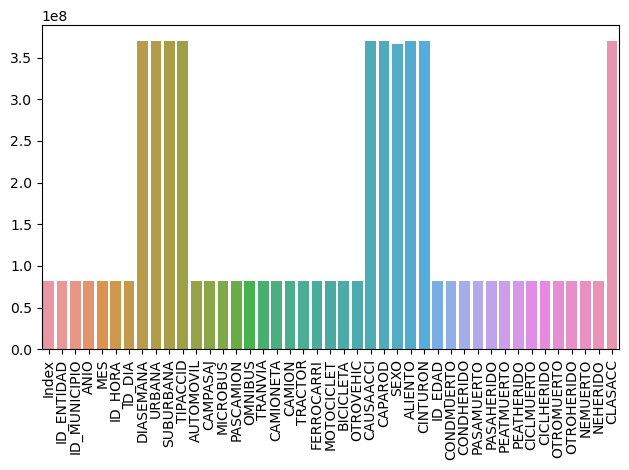

In [129]:
sns.barplot(x=memory.index, y=memory[0].values)
plt.xticks(rotation=90)  # Puedes probar con otros ángulos como 90
plt.tight_layout()       # Ajusta el espacio para evitar cortes
plt.show()

In [4]:
df_atus_ligero = pd.read_csv(path.data_processed_dir().joinpath('atus_ligero.csv'))

In [18]:
for i in df_atus_ligero.columns:
    print(df_atus_ligero[i].unique())

[       0        1        2 ... 10340219 10340220 10340221]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
[2009 2016 2003 1998 2011 2002 2021 2010 1997 2023 2013 2012 2007 2015
 2006 2004 2005 2014 2001 1999 2018 2000 2008 2017 2020 2022 2019]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1 11 17 18 19 21  0  3  8 10 15 16 22 23  2  4 12  7  9 13 14 20  6  5]
[10 24 23 25 26 27 28 29 11 12 14 13 15 16 17 18 19 20 21 22  1  2  3  4
  5  6  7  8  9 30 31]
[6 5 7 1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[1 0 2 3 4 6 5 7 9 8]
[0 1 2 3 4 5 7 9 6 8]
[0 1 2 3 4 9 7 5 6]
[0 1 2 3 4 7 9 5 8 6]
[0 1 2 3 5 4 6 9]
[0 1 2 9]
[0 1 2 3 4 5 7 8 9 6]
[0 1 2 4 3 8 5 7 9]
[0 1 2 3 4 5 9 6 7 8]
[0 1 2 3 4 5 9]
[0 1 2 5 3 4 6 9 7 8]
[0 1 2 4 3 8 6 5 7 9]
[0 1 2 3 4 9 8 5 7 6]
[1 2 3 4 5 6]
[1 2 3]
[1 0 2]
[1 2 3 4]
[1 2 3 4]
[18 39 44 51 37 35 23 32 22 21 24 28 26 33 43 72  0 19 20 56 57 48 53 50
 31 52 76 34 25 46 27 49 17 64 67 45 61 36 55 41 38 42 

In [7]:
df_atus_ligero.drop(['ID_MUNICIPIO','NEMUERTO','NEHERIDO'],inplace=True, axis=1)

In [13]:
df_atus_ligero.drop(df_atus_ligero[df_atus_ligero['CICLHERIDO'] == -1].index, inplace=True)

In [15]:
df_atus_ligero.drop(df_atus_ligero[df_atus_ligero['ID_HORA'] == 99].index, inplace=True)

In [17]:
df_atus_ligero.drop(['URBANA','SUBURBANA'], inplace=True, axis=1)

In [ ]:
df_atus_ligero.drop(['TRANVIA'], inplace=True, axis=1)

In [21]:
df_atus_ligero.drop(['FERROCARRI'], inplace=True, axis=1)

In [24]:
df_atus_ligero.drop(['Unnamed: 0'], inplace=True, axis=1)

In [30]:
df_atus_ligero.drop(['AUTOMOVIL','CAMPASAJ','MICROBUS','PASCAMION','OMNIBUS','CAMIONETA','CAMION','TRACTOR','MOTOCICLET','BICICLETA','OTROVEHIC'], inplace=True, axis=1)

In [31]:
for i in df_atus_ligero.columns:
    print(df_atus_ligero[i].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
[2009 2016 2003 1998 2011 2002 2021 2010 1997 2023 2013 2012 2007 2015
 2006 2004 2005 2014 2001 1999 2018 2000 2008 2017 2020 2022 2019]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1 11 17 18 19 21  0  3  8 10 15 16 22 23  2  4 12  7  9 13 14 20  6  5]
[10 24 23 25 26 27 28 29 11 12 14 13 15 16 17 18 19 20 21 22  1  2  3  4
  5  6  7  8  9 30 31]
[6 5 7 1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[1 2 3 4 5 6]
[1 2 3]
[1 0 2]
[1 2 3 4]
[1 2 3 4]
[18 39 44 51 37 35 23 32 22 21 24 28 26 33 43 72  0 19 20 56 57 48 53 50
 31 52 76 34 25 46 27 49 17 64 67 45 61 36 55 41 38 42 30 71 47 58 59 80
 40 14 70 29 65 99 54 63 15 16 62 69 60 68 12 74 82 73 66 86 13 85 77 79
 75 78 84 83 90 81 88 87 92 89 93 91 95 94 97 98 96]
[0 1 2 3 4 5 8 6 9 7]
[ 0  1  2  5  3  4  8  7  6  9 10 30 34 15]
[ 0  1  5  2 26  7  3 10  4  6 21  9 11 17 15  8 12 36 19 18 33 13 20 16
 14]
[ 0  1  3  2  4  8  5  9  6 10  

In [32]:
df_atus_ligero.drop(['CAPAROD'], inplace=True, axis=1)

In [36]:
df_atus_ligero['MUERTOS'] = df_atus_ligero[['CONDMUERTO','PASAMUERTO','PEATMUERTO','CICLMUERTO','OTROMUERTO']].sum(axis=1)

In [37]:
df_atus_ligero['HERIDOS'] = df_atus_ligero[['CONDHERIDO','PASAHERIDO','PEATHERIDO','CICLHERIDO','OTROHERIDO']].sum(axis=1)

In [38]:
df_atus_ligero

,ID_ENTIDAD,ANIO,MES,ID_HORA,ID_DIA,DIASEMANA,TIPACCID,CAUSAACCI,SEXO,ALIENTO,...,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,CLASACC,MUERTOS,HERIDOS
0,1,2009,1,1,10,6,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,1,2009,1,11,10,6,2,1,1,2,...,0,0,0,0,0,0,0,1,0,0
2,1,2009,1,17,10,6,2,1,1,2,...,0,0,0,0,0,0,0,1,0,0
3,1,2009,1,18,10,6,2,1,1,2,...,1,0,0,0,0,0,0,2,0,2
4,1,2009,1,19,10,6,3,1,1,2,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291378,32,2019,12,9,27,5,2,1,1,2,...,0,0,0,0,0,0,0,1,0,0
10291379,32,2019,12,2,29,7,2,1,1,1,...,0,0,0,0,0,0,0,1,0,0
10291380,32,2019,12,18,30,1,1,1,1,2,...,1,0,0,0,0,0,0,2,0,2
10291381,32,2019,12,15,31,2,2,1,2,2,...,0,0,0,0,0,0,0,1,0,0


In [39]:
df_atus_ligero.drop(['CONDHERIDO','PASAHERIDO','PEATHERIDO','CICLHERIDO','OTROHERIDO','CONDMUERTO','PASAMUERTO','PEATMUERTO','CICLMUERTO','OTROMUERTO'], inplace=True, axis=1)

In [40]:
df_atus_ligero

,ID_ENTIDAD,ANIO,MES,ID_HORA,ID_DIA,DIASEMANA,TIPACCID,CAUSAACCI,SEXO,ALIENTO,CINTURON,ID_EDAD,CLASACC,MUERTOS,HERIDOS
0,1,2009,1,1,10,6,1,1,1,1,1,18,1,0,0
1,1,2009,1,11,10,6,2,1,1,2,1,39,1,0,0
2,1,2009,1,17,10,6,2,1,1,2,1,44,1,0,0
3,1,2009,1,18,10,6,2,1,1,2,1,51,2,0,2
4,1,2009,1,19,10,6,3,1,1,2,1,37,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291378,32,2019,12,9,27,5,2,1,1,2,1,56,1,0,0
10291379,32,2019,12,2,29,7,2,1,1,1,1,25,1,0,0
10291380,32,2019,12,18,30,1,1,1,1,2,1,45,2,0,2
10291381,32,2019,12,15,31,2,2,1,2,2,1,21,1,0,0


In [42]:
exportar_csv(df=df_atus_ligero, name='atus_optimo.csv')

In [7]:
df_atus_ligero = df_atus_ligero[(df_atus_ligero['ID_EDAD'] != 0) & (df_atus_ligero['ID_EDAD'] != 100)]

In [10]:
exportar_csv(df=df_atus_ligero, name='atus_without_outliers.csv')